In [56]:
#Import the standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
import warnings
warnings.filterwarnings('ignore')


# Data Preprocessing

In [57]:
#Load the dataset
data=pd.read_csv('/content/stock_data.csv')
data.head()


,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1


In [58]:
#Checking the data shape
data.shape


(5791, 2)

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5791 entries, 0 to 5790
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       5791 non-null   object
 1   Sentiment  5791 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 90.6+ KB


# Data Cleaning and Visualization Process

<Axes: ylabel='Sentiment'>

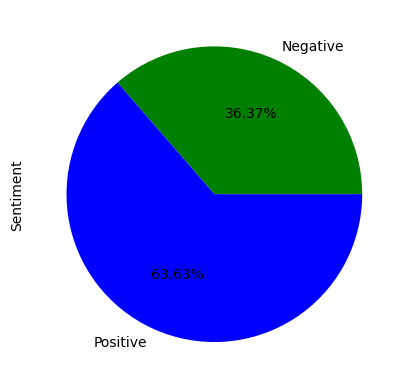

In [60]:
#To visualize the Sentiment in the dataset
data.Sentiment.value_counts(normalize=True).sort_index().plot(kind='pie',labels=['Negative','Positive'],
    colors=['green','blue'],
    autopct='%.2f%%')


In [61]:
#Text Preprcoessing with sample world tokenization
a=data.Text.values[1]
a


'user: AAP MOVIE. 55% return for the FEA/GEED indicator just 15 trades for the year.  AWESOME.  '

In [62]:
# Download the 'punkt' resource
nltk.download('punkt')

# Text Preprocessing with sample word tokenization
a = data.Text.values[1]
tokenize = word_tokenize(a)
print(tokenize)


['user', ':', 'AAP', 'MOVIE', '.', '55', '%', 'return', 'for', 'the', 'FEA/GEED', 'indicator', 'just', '15', 'trades', 'for', 'the', 'year', '.', 'AWESOME', '.']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [63]:
# Download the 'stopwords' resource (if not already downloaded)
nltk.download('stopwords')

# Get the list of English stop words
english_stop = stopwords.words('english')

# Print the stop words
print(', '.join(english_stop))


i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, must

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Remove the stopwords and Stemming and Lemmatization

In [64]:
# Function to remove stop words
def remove_words(text):
    return [word for word in text if word.lower() not in english_stop]

# Apply the function to the one question
filtered_words = remove_words(tokenize)
print(filtered_words)


['user', ':', 'AAP', 'MOVIE', '.', '55', '%', 'return', 'FEA/GEED', 'indicator', '15', 'trades', 'year', '.', 'AWESOME', '.']


In [65]:
# Stemming process
stemmer = SnowballStemmer("english")
def stemming(text):
    return [stemmer.stem(word) for word in text]

stemmed_words = stemming(tokenize)
print(stemmed_words)


['user', ':', 'aap', 'movi', '.', '55', '%', 'return', 'for', 'the', 'fea/ge', 'indic', 'just', '15', 'trade', 'for', 'the', 'year', '.', 'awesom', '.']


In [66]:
# Lemmatization process
lemmatizer = WordNetLemmatizer()
def lemmatization(text):
    return [lemmatizer.lemmatize(word) for word in text]

lemmatized_words = lemmatization(tokenize)
print(lemmatized_words)


['user', ':', 'AAP', 'MOVIE', '.', '55', '%', 'return', 'for', 'the', 'FEA/GEED', 'indicator', 'just', '15', 'trade', 'for', 'the', 'year', '.', 'AWESOME', '.']


In [67]:
# Download the 'averaged_perceptron_tagger' resource
nltk.download('averaged_perceptron_tagger')

# Perform Part of speech tagging
tagged = nltk.pos_tag(tokenize)

print(tagged)


[('user', 'NN'), (':', ':'), ('AAP', 'NNP'), ('MOVIE', 'NNP'), ('.', '.'), ('55', 'CD'), ('%', 'NN'), ('return', 'NN'), ('for', 'IN'), ('the', 'DT'), ('FEA/GEED', 'NNP'), ('indicator', 'NN'), ('just', 'RB'), ('15', 'CD'), ('trades', 'NNS'), ('for', 'IN'), ('the', 'DT'), ('year', 'NN'), ('.', '.'), ('AWESOME', 'NNP'), ('.', '.')]


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [68]:
import re
# Preprocessing function
def preprocessing(text):
    # Word Tokenize and remove non-alphabetic characters
    words = re.sub('[^a-zA-Z]', ' ', text)
    words = word_tokenize(words)

    # Remove stop words
    words = [word for word in words if word.lower() not in english_stop]

    # Apply stemming
    words = [stemmer.stem(word) for word in words]

    # Apply lemmatization
    words = [lemmatizer.lemmatize(word) for word in words]

    # Convert all words to lowercase and join them back into a string
    words = ' '.join([word.lower() for word in words])
    return words

# Apply the preprocessing function to the 'Text' column in the 'data' DataFrame
data['Text'] = data['Text'].apply(preprocessing)
data.head()

,Text,Sentiment
0,kicker watchlist xide tit soq pnk cpw bpz aj t...,1
1,user aap movi return fea geed indic trade year...,1
2,user afraid short amzn look like near monopoli...,1
3,mnta,1
4,oi,1


# Machine Leaning Model traing

In [69]:
#Divided the data into two variable
X=data['Text']
y=data['Sentiment']


In [70]:
# Custom tokenizer function with stemming
def tokenize(text):
    words = word_tokenize(text)
    words = [stemmer.stem(word) for word in words if word.lower() not in english_stop]
    return words

# Create TfidfVectorizer with custom tokenizer
vector = TfidfVectorizer(tokenizer=tokenize, stop_words=english_stop, ngram_range=(1, 2), max_features=1000)
vector

TfidfVectorizer(max_features=1000, ngram_range=(1, 2),
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                tokenizer=<function tokenize at 0x7a0e376269e0>)

In [71]:
# Fit the TfidfVectorizer to the preprocessed text data 'X'
vector.fit(X)

# Transform 'X' into a sparse matrix using the fitted TfidfVectorizer
X = vector.transform(X)


In [72]:
X.toarray()


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.19275004, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [73]:
#split the data into train and test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=120)


# Machine Learning Model

In [74]:
from sklearn.metrics import classification_report,confusion_matrix
def modelbulid(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    model_pred=model.predict(X_test)
    print(f'The {model} accuracy score is {accuracy_score(y_test,model_pred)*100:.2f}')
    print('Classification_report',classification_report(y_test,model_pred))
    confusion=confusion_matrix(y_test,model_pred)
    sns.heatmap(confusion,annot=True,xticklabels=['Negative','Positive'],
    yticklabels=['Negative','Positive'],cmap='jet')


The LogisticRegression() accuracy score is 75.95
Classification_report               precision    recall  f1-score   support

          -1       0.72      0.54      0.62       627
           1       0.77      0.88      0.82      1111

    accuracy                           0.76      1738
   macro avg       0.75      0.71      0.72      1738
weighted avg       0.75      0.76      0.75      1738



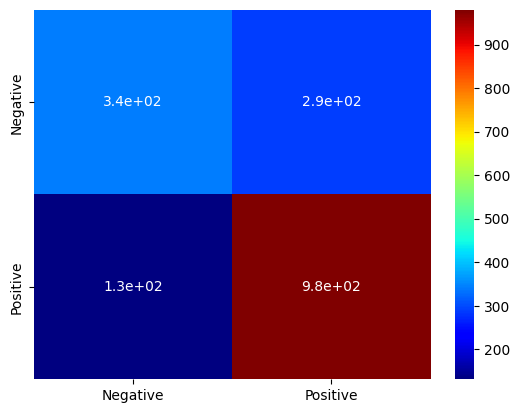

In [75]:
#Logisticmodel
logistic=LogisticRegression()
modelbulid(logistic,X_train,X_test,y_train,y_test)


The DecisionTreeClassifier() accuracy score is 71.75
Classification_report               precision    recall  f1-score   support

          -1       0.60      0.63      0.62       627
           1       0.79      0.77      0.78      1111

    accuracy                           0.72      1738
   macro avg       0.70      0.70      0.70      1738
weighted avg       0.72      0.72      0.72      1738



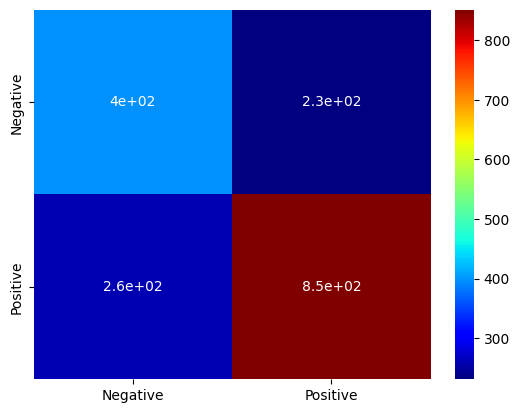

In [76]:
#DecisionTreeClassifier
tree=DecisionTreeClassifier()
modelbulid(tree,X_train,X_test,y_train,y_test)


The RandomForestClassifier() accuracy score is 76.47
Classification_report               precision    recall  f1-score   support

          -1       0.68      0.66      0.67       627
           1       0.81      0.82      0.82      1111

    accuracy                           0.76      1738
   macro avg       0.74      0.74      0.74      1738
weighted avg       0.76      0.76      0.76      1738



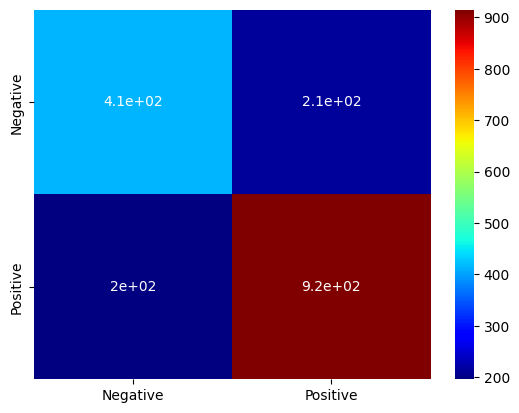

In [77]:
random=RandomForestClassifier()
modelbulid(random,X_train,X_test,y_train,y_test)


The KNeighborsClassifier() accuracy score is 69.22
Classification_report               precision    recall  f1-score   support

          -1       0.76      0.21      0.33       627
           1       0.68      0.96      0.80      1111

    accuracy                           0.69      1738
   macro avg       0.72      0.59      0.57      1738
weighted avg       0.71      0.69      0.63      1738



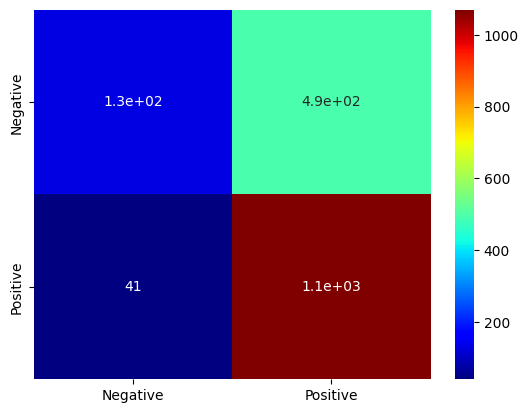

In [78]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
modelbulid(knn,X_train,X_test,y_train,y_test)


In conclusion, the sentiment analysis project successfully applied machine learning models to analyze text data and determine sentiment polarity. After evaluating several classifiers, the Logistic Regression model demonstrated the best performance with high accuracy and balanced precision and recall for both positive and negative sentiments. This model is recommended for deployment in sentiment analysis applications, enabling better insights and decision-making based on text sentiment. Further improvements can be explored by using more diverse data sources and considering advanced machine learning techniques in the future.
